In [1]:
import pickle

from pprint import pprint
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = "../data/datasets/tfidf/"
df = pd.read_csv('../data/datasets/contents.csv', dtype={'Category': 'category'})

with open(DATA_PATH+'features_train.pickle', 'rb') as data:
    features_train = pickle.load(data)

with open(DATA_PATH+'labels_train.pickle', 'rb') as data:
    labels_train = pickle.load(data)

with open(DATA_PATH+'features_test.pickle', 'rb') as data:
    features_test = pickle.load(data)

with open(DATA_PATH+'labels_test.pickle', 'rb') as data:
    labels_test = pickle.load(data)


In [3]:
features_train = features_train[:10_000]
labels_train = labels_train[:10_000]


In [4]:
mnbc = MultinomialNB()
mnbc

MultinomialNB()

In [5]:
# FIT
mnbc.fit(features_train, labels_train)
# PREDS
mnbc_pred = mnbc.predict(features_test)

In [6]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.7009


In [7]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.6959555555555555


In [8]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.73      0.72      0.72     20048
           1       0.67      0.82      0.74     20732
           2       0.79      0.01      0.01      4220

    accuracy                           0.70     45000
   macro avg       0.73      0.51      0.49     45000
weighted avg       0.71      0.70      0.66     45000



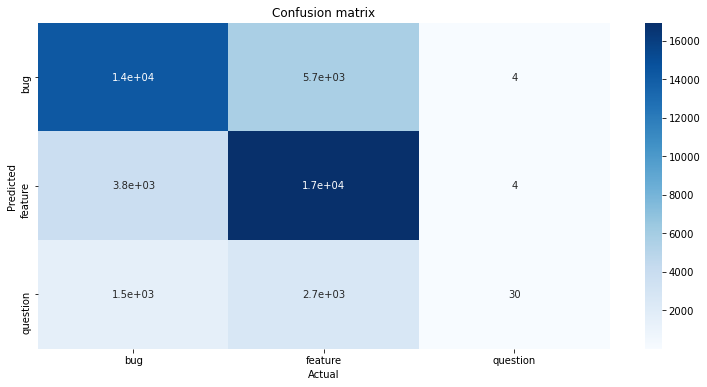

In [9]:
aux_df = pd.DataFrame([['bug', 0], ['feature', 1], ['question', 2]], columns=['Category', 'Category_Code'])

conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [10]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])

In [11]:
with open('../models/best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('../models/df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)